# **Homework 1** 

---
### **Problem 1.1**  
**Familiarization with Contours and Constraints:** Using a topographic mapping tool from the Internet find real-world examples of terrain with the following features. Take a screen capture of the elevation contour plot and include the Latitude/Longitude coordinates for each location.  
    
**(a)** A mountain peak  
**(b)** A mountain basin or bowl (i.e., opposite of a peak)  
**(c)** A long valley  
**(d)** A saddle point  
**(e)** An area and feature with an analogous example of an **equality** constraint (natural or human-made).  
**(f)** An area and feature with an analogous example of an **inequality** constraint (natural or human-made).   

**1.1a**

**Mt Timpanogos Peak**  
**40.39089, -111.64596**
  
<img src="1.1%20Images/1.1a%20Mt%20Timpanogos%20Peak.jpg" width="600">

**1.1b**

**Dog Valley**  
**38.6650, -112.5799**  
  
<img src="1.1%20Images/1.1b%20Dog%20Valley.jpg" width="600">

**1.1c**

**San Joaquin Valley**  
**37.9833, -121.8677**  

<img src="1.1%20Images/1.1c%20San%20Joaquin%20Valley.jpg" width="600">

**1.1d**

**Twin Peaks & Dromedary Peak**  
**40.5527, -111.6541**  
  
<img src="1.1%20Images/1.1d%20Twin%20Peaks.jpg" width="600">

**1.1e**

**Playa Organos, Costa Rica**  
**9.7976, -84.9035**  
  
If asked to walk the shoreline you will be constrained to an elevation of 0, it will not go up or down. (The beach is very flat)
  
<img src="1.1%20Images/1.1e%20Playa%20Organos%20Coastline.jpg" width="600">

**1.1f**

**Waipio Valley, Hawaii**  
**20.1116, -155.5965**  
  
It is the steepest valley in the world, effectively making it impossible to exit the valley.  
  
<img src="1.1%20Images/1.1f%20Waipio%20Valley.jpg" width="600">

---
### **Problem 1.2**  
**Unconstrained Brachistochrome Problem:**  Solve the Brachistochrone Problem (with friction) using an unconstrained optimizer (like scipy.optimize). The problem is defined in the textbook in Appendix D.1.7. Complete the following:  
  
**(a)** Plot the optimal shape with $n=12$ (10 design variables, the beginning and the end should be fixed).  
**(b)** In a table, report the travel time between the two end points when $n=12$. Don't forget to put $g = 9.81$, the acceletation of gravity, back in.  
**(c)** Study the effect of increased problem dimensionality. Start with 4 points and double the dimension each time up to 128 (i.e., 4, 8, 16, 32, 64, 128). Plot and discuss the increase in computational expense with problem size. Include one plot that shows the number of total function calls for each dimension (i.e. 4, 8, etc.) and a second plot that calculates the wall time (“end time”- “start time” as recorded by the CPU for the optimization) for each dimension.  
**(d)** In 200 words or less describe what you learned.  


**CODE**

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

def solve_brachistochrone(n, MU_K=0.3, h=1.0, x_end=1.0, y_end=0, g=9.81):
    # Get parammeters
    x = np.linspace(0, x_end, n)
    dx = np.diff(x)
    
    # Objective function
    def objective(y_interior):
        # Concatenate fixed endpoints with interior design variables
        y = np.concatenate(([h], y_interior, [y_end]))
        dy = np.diff(y)
        
        # Calculate segments of the sum
        numerator = np.sqrt(dx**2 + dy**2)
        denom1 = np.sqrt(h - y[1:] - MU_K * x[1:])
        denom2 = np.sqrt(h - y[:-1] - MU_K * x[:-1])
        denominator = denom1 + denom2
        
        return np.sum(numerator / denominator)
    
    # Initial guess: Straight line between (0,h) and (x_end,y_end)
    y_guess = np.linspace(h, y_end, n)[1:-1]
    
    # Optimize
    start_time = time.time()
    res = minimize(objective, y_guess)
    end_time = time.time() - start_time
    
    # Final path and total travel time 
    y_opt = np.concatenate(([h], res.x, [y_end]))
    travel_time = (2 / np.sqrt(g)) * res.fun
    
    return x, y_opt, travel_time, res.nfev, end_time




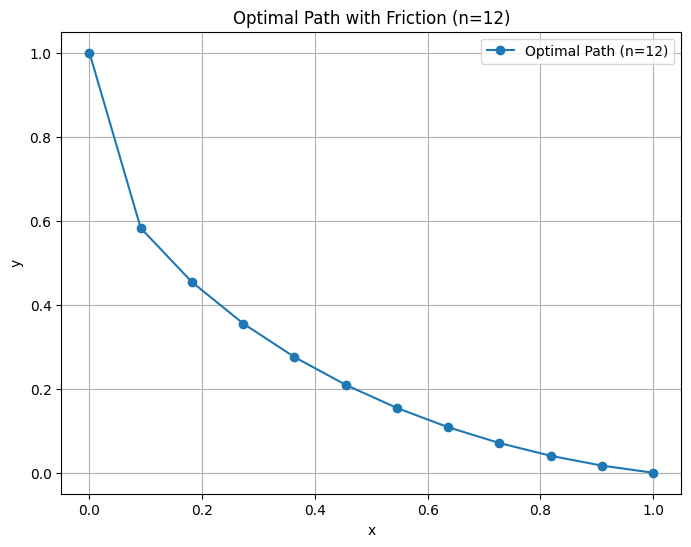

In [61]:
'''
Plot the optimal shape with n = 12 
(10 design variables, the beginning and end should be fixed)
'''

n = 12
x, y_opt, travel_time, nfev, wall_time = solve_brachistochrone(n)

# plotting the optimal shape
plt.figure(figsize=(8, 6))
plt.plot(x, y_opt, marker='o', label='Optimal Path (n=12)')
plt.title('Optimal Path with Friction (n=12)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

**1.2b**

In [62]:
'''
In a table, report the travel time between the two end points when n = 12. 
Don't forget to put g = 9.81, the acceleration of gravity back in
'''

print(f"Travel time for n={n}: {travel_time:.4f} seconds")


Travel time for n=12: 0.8920 seconds


**1.2c**

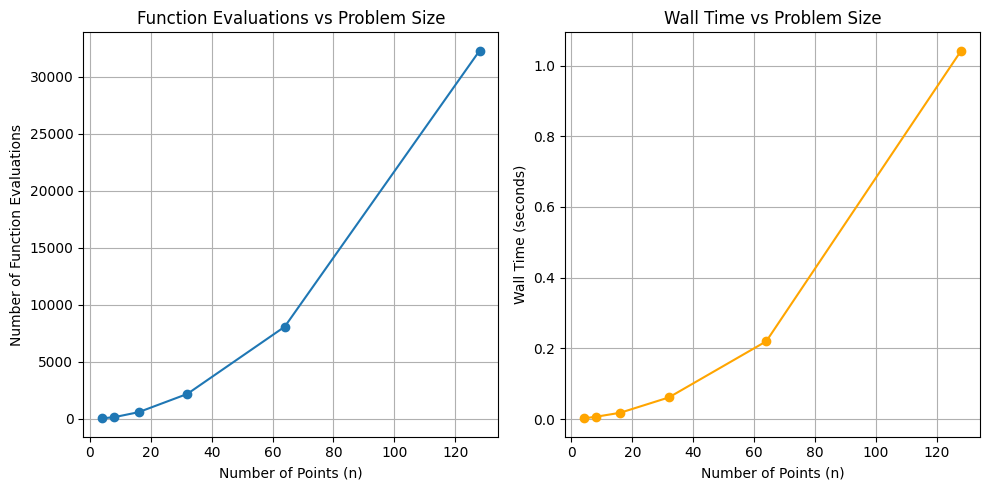

In [63]:
'''
Study the effect of increased problem dimensionality. Start with 4 points and double the dimension
each time up to 128 (i.e., 4, 8, 16, 32, 64, 128). Plot and discuss the increase in computational
expense with problem size. Include one plot that shows the number of total function calls for each
dimension (i.e. 4, 8, etc.) and a second plot that calculates the wall time (“end time”- “start time”
as recorded by the CPU for the optimization) for each dimension.
'''

n_values = [4, 8, 16, 32, 64, 128]
nfev_values = []
wall_time_values = []
for n in n_values:
    x, y_opt, travel_time, nfev, wall_time = solve_brachistochrone(n)
    nfev_values.append(nfev)
    wall_time_values.append(wall_time)
    
# Plotting number of function evaluations vs problem size
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_values, nfev_values, marker='o')
plt.title('Function Evaluations vs Problem Size')
plt.xlabel('Number of Points (n)')
plt.ylabel('Number of Function Evaluations')
plt.grid(True)
# Plotting wall time vs problem size
plt.subplot(1, 2, 2)
plt.plot(n_values, wall_time_values, marker='o', color='orange')
plt.title('Wall Time vs Problem Size')
plt.xlabel('Number of Points (n)')
plt.ylabel('Wall Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()


**1.2d**

**What I learned**  
  
This problem wsa a good first practical introduction to discretization, and was helpful in teaching me how to approxiamte a continuous path by dividing it into linear segments. Implementing the objective function required summing the travel time across these segments, where I learned that the magnitude of gravity affects the final time but not the coordinates of the optimal path.  
  
Also, I learned a bit about warm starts from the hint in the homework. It was interesting to learn that starting from a lower-dimension case can improve the efficiency of the optimization. 

---
### **1.3**  
**Constrained Truss Problem:** Solve the ten-bar truss problem defined in D.2.2 of the book using an accessible optimizer. Code to analyze the truss is available in the resource repository: https://github.com/mdobook/resources/tree/main/exercises/tenbartruss  
  
Report and discuss the following:  
  
**(a)** the optimal mass and corresponding cross-sectional areas.  
**(b)** a convergence plot: x-axis should be some measure of computational time (e.g., major iterations, function calls) on a linear scale, the y-axis should be some measure of convergence. If your solver gives you “first order optimality” that is ideal (we will learn what that means later), but other reasonable metrics can be used instead.  
**(c)** the number of function calls required to convergence (functions calls from the truss function).  
**(d)** In 200 words or less describe what you learned.  


**CODE**

In [ ]:
import numpy as np
from math import sin, cos, sqrt, pi

def truss(A):
    """Computes mass and stress for the 10-bar truss problem

    Parameters
    ----------
    A : ndarray of length nbar
        cross-sectional areas of each bar
        see image in book for number order if needed

    Outputs
    -------
    mass : float
        mass of the entire structure
    stress : ndarray of length nbar
        stress in each bar

    """

    # --- specific truss setup -----
    P = 1e5  # applied loads
    Ls = 360.0  # length of sides
    Ld = sqrt(360**2 * 2)  # length of diagonals

    start = [5, 3, 6, 4, 4, 2, 5, 6, 3, 4]
    finish = [3, 1, 4, 2, 3, 1, 4, 3, 2, 1]
    phi = np.array([0, 0, 0, 0, 90, 90, -45, 45, -45, 45])*pi/180
    L = np.array([Ls, Ls, Ls, Ls, Ls, Ls, Ld, Ld, Ld, Ld])

    nbar = len(A)  # number of bars
    E = 1e7*np.ones(nbar)  # modulus of elasticity
    rho = 0.1*np.ones(nbar)  # material density

    Fx = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    Fy = np.array([0.0, -P, 0.0, -P, 0.0, 0.0])
    rigid = [False, False, False, False, True, True]
    # ------------------

    n = len(Fx)  # number of nodes
    DOF = 2  # number of degrees of freedom

    # mass
    mass = np.sum(rho*A*L)

    # stiffness and stress matrices
    K = np.zeros((DOF*n, DOF*n))
    S = np.zeros((nbar, DOF*n))

    for i in range(nbar):  # loop through each bar

        # compute submatrix for each element
        Ksub, Ssub = bar(E[i], A[i], L[i], phi[i])

        # insert submatrix into global matrix
        idx = node2idx([start[i], finish[i]], DOF)  # pass in the starting and ending node number for this element
        K[np.ix_(idx, idx)] += Ksub
        S[i, idx] = Ssub

    # applied loads
    F = np.zeros((n*DOF, 1))

    for i in range(n):
        idx = node2idx([i+1], DOF)  # add 1 b.c. made indexing 1-based for convenience
        F[idx[0]] = Fx[i]
        F[idx[1]] = Fy[i]


    # boundary condition
    idx = [i+1 for i, val in enumerate(rigid) if val] # add 1 b.c. made indexing 1-based for convenience
    remove = node2idx(idx, DOF)

    K = np.delete(K, remove, axis=0)
    K = np.delete(K, remove, axis=1)
    F = np.delete(F, remove, axis=0)
    S = np.delete(S, remove, axis=1)

    # solve for deflections
    d = np.linalg.solve(K, F)

    # compute stress
    stress = np.dot(S, d).reshape(nbar)

    return mass, stress



def bar(E, A, L, phi):
    """Computes the stiffness and stress matrix for one element

    Parameters
    ----------
    E : float
        modulus of elasticity
    A : float
        cross-sectional area
    L : float
        length of element
    phi : float
        orientation of element

    Outputs
    -------
    K : 4 x 4 ndarray
        stiffness matrix
    S : 1 x 4 ndarray
        stress matrix

    """

    # rename
    c = cos(phi)
    s = sin(phi)

    # stiffness matrix
    k0 = np.array([[c**2, c*s], [c*s, s**2]])
    k1 = np.hstack([k0, -k0])
    K = E*A/L*np.vstack([k1, -k1])

    # stress matrix
    S = E/L*np.array([-c, -s, c, s])

    return K, S



def node2idx(node, DOF):
    """Computes the appropriate indices in the global matrix for
    the corresponding node numbers.  You pass in the number of the node
    (either as a scalar or an array of locations), and the degrees of
    freedom per node and it returns the corresponding indices in
    the global matrices

    """

    idx = np.array([], dtype=int)

    for i in range(len(node)):

        n = node[i]
        start = DOF*(n-1)
        finish = DOF*n

        idx = np.concatenate((idx, np.arange(start, finish, dtype=int)))

    return idx

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# --- 1. Objective Function ---
def objective(A):
    mass, _ = truss(A)
    return mass

# --- 2. Constraint Function ---
def stress_constraints(A):
    _, stress = truss(A)
    
    # Define yield stresses: 25k psi for all except member 9 (75k psi) 
    sigma_y = 25000 * np.ones(10)
    sigma_y[8] = 75000  
    
    # Constraint: sigma_y - |stress| >= 0 
    return sigma_y - np.abs(stress)

# --- 3. Optimization Setup ---
# Track convergence history
history = []

def callback(xk):
    # Record current mass at each major iteration 
    mass_current = objective(xk)
    history.append(mass_current)

x0 = 5.0 * np.ones(10) # Starting with a robust initial guess
bounds = [(0.1, None) for _ in range(10)] # Manufacturing bound constraint 
con = {'type': 'ineq', 'fun': stress_constraints}

# Solve using SLSQP
res = minimize(
    objective, 
    x0, 
    method='SLSQP', 
    bounds=bounds, 
    constraints=con,
    callback=callback,
    options={'disp': True, 'ftol': 1e-6}
)

# --- 4. Results Reporting ---
print("-" * 30)
print(f"Optimization Success: {res.success}")


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1497.5999999767391
            Iterations: 25
            Function evaluations: 255
            Gradient evaluations: 21
------------------------------
Optimization Success: True


**1.3a**

In [71]:
'''
The optimal mass and corresponding cross-sectional areas.
'''

print(f"Optimal Mass: {res.fun:.4f} lbs")
print("Optimal Cross-Sectional Areas (in^2):")
for i, area in enumerate(res.x):
    print(f"  Bar {i+1}: {area:.4f}")


Optimal Mass: 1497.6000 lbs
Optimal Cross-Sectional Areas (in^2):
  Bar 1: 7.9000
  Bar 2: 0.1000
  Bar 3: 8.1000
  Bar 4: 3.9000
  Bar 5: 0.1000
  Bar 6: 0.1000
  Bar 7: 5.7983
  Bar 8: 5.5154
  Bar 9: 3.6770
  Bar 10: 0.1414


**1.3b**

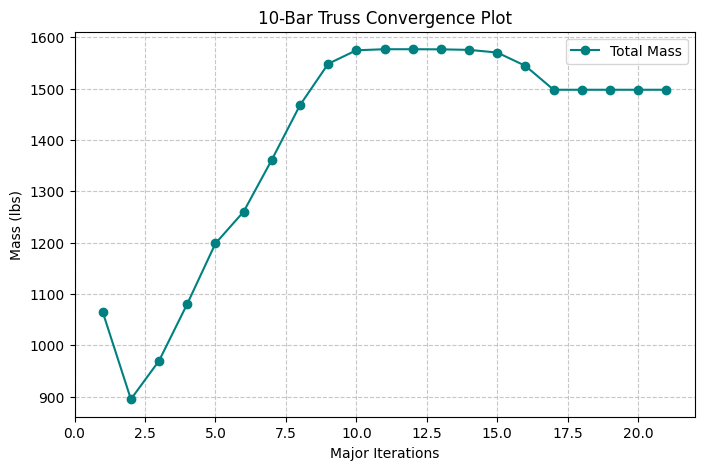

The optimization converged in 21 major iterations.


In [72]:
'''
A convergence plot: x-axis should be some measure of computational time (e.g., major iterations,
function calls) on a linear scale, the y-axis should be some measure of convergence. If your solver
gives you “first order optimality” that is ideal (we will learn what that means later), but other
reasonable metrics can be used instead.
'''

# --- Convergence Plot ---
plt.figure(figsize=(8, 5))

# Plotting mass vs. iterations
iterations = np.arange(1, len(history) + 1)
plt.plot(iterations, history, 'o-', color='teal', label='Total Mass')

plt.title('10-Bar Truss Convergence Plot')
plt.xlabel('Major Iterations') # 
plt.ylabel('Mass (lbs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

print(f"The optimization converged in {len(history)} major iterations.")

**1.3c**

In [ ]:
final_mass, final_stresses = truss(res.x)
print(f"Total Function Calls: {res.nfev}") # 

Total Function Calls: 255


**1.3d**

**What I learned**  
  
Solving the ten-bar truss problem taught me how to work with constrained optimization, where the objective is to minimize the structural mass while still minding failure limits. I learned how to integrate a structural analysis function into an optimizer to evaluate stresses in each member based on their cross-sectional areas. The provided code was very helpful in all of that.  
  
Looking at the final results, it was clear how the boudn constrains like the $0.1 \text{ in}^2$ minimum limit the feasible region. Finally, creating the convergence plot helped me visualize how the solver iteratively refines the design variables to reach the optimal mass while still taking into account the constraints. 